<a href="https://colab.research.google.com/github/Tijo622/Dominos-Purchase-order/blob/main/Domino_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales_dataset=pd.read_csv("/content/Pizza_Sale - pizza_sales.csv")
ingredients_dataset=pd.read_csv("/content/Pizza_ingredients - Pizza_ingredients.csv")

In [ ]:
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
sales_dataset["total_price"].fillna(sales_dataset["unit_price"]* sales_dataset["quantity"],inplace=True)


In [ ]:
sales_dataset.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,23


In [ ]:
category_mapping=sales_dataset[["pizza_name_id","pizza_category"]].dropna().drop_duplicates()
category_mapping=category_mapping.set_index("pizza_name_id")["pizza_category"].to_dict()

In [ ]:
sales_dataset["pizza_category"]=sales_dataset["pizza_category"].fillna(sales_dataset["pizza_name_id"].map(category_mapping))


In [ ]:
sales_dataset.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
ingredients_mapping = sales_dataset[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ingredients_mapping = ingredients_mapping.set_index('pizza_name')['pizza_ingredients'].to_dict()

In [ ]:
sales_dataset['pizza_ingredients'] = sales_dataset['pizza_ingredients'].fillna(sales_dataset['pizza_name'].map(ingredients_mapping))

In [ ]:
sales_dataset.isna().sum()


,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
ingredients_name_mapping = sales_dataset[['pizza_ingredients', 'pizza_name']].dropna().drop_duplicates()
ingredients_name_mapping = ingredients_name_mapping.set_index('pizza_ingredients')['pizza_name'].to_dict()

In [ ]:
sales_dataset['pizza_name'] = sales_dataset['pizza_name'].fillna(sales_dataset['pizza_ingredients'].map(ingredients_name_mapping))

In [ ]:
sales_dataset.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
name_id_mapping = sales_dataset[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_mapping = name_id_mapping.set_index('pizza_name')['pizza_name_id'].to_dict()

sales_dataset['pizza_name_id'] = sales_dataset['pizza_name_id'].fillna(sales_dataset['pizza_name'].map(name_id_mapping))

In [ ]:
sales_dataset.isna().sum()


,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
mean_qty=ingredients_dataset.groupby("pizza_name_id")["Items_Qty_In_Grams"].mean()

In [ ]:
ingredients_dataset["Items_Qty_In_Grams"]=ingredients_dataset["Items_Qty_In_Grams"].fillna(ingredients_dataset["pizza_name_id"].map(mean_qty))

In [ ]:
ingredients_dataset.isna().sum()

,0
pizza_name_id,0
pizza_name,0
pizza_ingredients,0
Items_Qty_In_Grams,0


In [ ]:
merged_data=pd.merge(sales_dataset, ingredients_dataset, on="pizza_name_id", how="left")

In [ ]:
merged_data.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
merged_data.drop(columns=['pizza_name_y', 'pizza_ingredients_y'], inplace=True)
merged_data.rename(columns={
    'pizza_name_x': 'pizza_name',
    'pizza_ingredients_x': 'pizza_ingredients'
}, inplace=True)

In [ ]:
merged_data.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
merged_data.duplicated().sum()

80204

In [ ]:
merged_data=merged_data.drop_duplicates()
print(f"Number of rows after removing duplicates: {merged_data.shape[0]}")

Number of rows after removing duplicates: 187372


In [ ]:
merged_data1 = merged_data.copy()

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187372 entries, 0 to 267573
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            187372 non-null  int64  
 1   order_id            187372 non-null  int64  
 2   pizza_name_id       187372 non-null  object 
 3   quantity            187372 non-null  int64  
 4   order_date          187372 non-null  object 
 5   order_time          187372 non-null  object 
 6   unit_price          187372 non-null  float64
 7   total_price         187372 non-null  float64
 8   pizza_size          187372 non-null  object 
 9   pizza_category      187372 non-null  object 
 10  pizza_ingredients   187372 non-null  object 
 11  pizza_name          187372 non-null  object 
 12  Items_Qty_In_Grams  187372 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 20.0+ MB


In [ ]:
def extract_date(date):
    formats = ['%d-%m-%Y', '%d/%m/%Y', '%m/%d/%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT


In [ ]:
merged_data['order_date'] = merged_data['order_date'].apply(extract_date)

In [ ]:
merged_data.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
merged_data['day_of_week'] = merged_data['order_date'].dt.dayofweek
merged_data['month'] = merged_data['order_date'].dt.month
merged_data['week'] = merged_data['order_date'].dt.isocalendar().week
merged_data['year'] = merged_data['order_date'].dt.year

In [ ]:
merged_data.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
import holidays
us_holidays = holidays.US()
merged_data['holiday'] = merged_data['order_date'].apply(lambda x: 1 if x in us_holidays else 0)
merged_data[['order_date', 'holiday']].head()

,order_date,holiday
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
6,2015-01-01,1


In [ ]:
merged_data["promotion"]=merged_data["order_date"].dt.weekday.apply(lambda x:1 if x>=5 else 0)
merged_data[merged_data["promotion"]==1][["order_date", "promotion"]]

,order_date,promotion
1789,2015-01-03,1
1790,2015-01-03,1
1791,2015-01-03,1
1793,2015-01-03,1
1794,2015-01-03,1
...,...,...
265236,2015-12-27,1
265237,2015-12-27,1
265239,2015-12-27,1
265241,2015-12-27,1


In [ ]:
merged_data.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
daily_sales=merged_data.groupby("order_date")["quantity"].sum().reset_index()
daily_sales

,order_date,quantity
0,2015-01-01,620
1,2015-01-02,631
2,2015-01-03,618
3,2015-01-04,414
4,2015-01-05,482
...,...,...
353,2015-12-27,347
354,2015-12-28,381
355,2015-12-29,302
356,2015-12-30,327


In [ ]:
print(merged_data.shape)

(187372, 19)


In [ ]:
pizza_sales=merged_data

In [ ]:
week_7_sales=merged_data[merged_data["week"]==7]
grouped_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()
print(f"Pizzas sold in week 7:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

total_quantity_sold = week_7_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 7: {total_quantity_sold} pizzas")

Pizzas sold in week 7:
The Barbecue Chicken Pizza: 252 pizzas
The Big Meat Pizza: 99 pizzas
The Brie Carre Pizza: 48 pizzas
The Calabrese Pizza: 72 pizzas
The California Chicken Pizza: 212 pizzas
The Chicken Alfredo Pizza: 92 pizzas
The Chicken Pesto Pizza: 76 pizzas
The Classic Deluxe Pizza: 117 pizzas
The Five Cheese Pizza: 60 pizzas
The Four Cheese Pizza: 214 pizzas
The Greek Pizza: 155 pizzas
The Green Garden Pizza: 105 pizzas
The Hawaiian Pizza: 135 pizzas
The Italian Capocollo Pizza: 108 pizzas
The Italian Supreme Pizza: 144 pizzas
The Italian Vegetables Pizza: 103 pizzas
The Mediterranean Pizza: 53 pizzas
The Mexicana Pizza: 140 pizzas
The Napolitana Pizza: 112 pizzas
The Pepper Salami Pizza: 85 pizzas
The Pepperoni Pizza: 110 pizzas
The Pepperoni, Mushroom, and Peppers Pizza: 39 pizzas
The Prosciutto and Arugula Pizza: 65 pizzas
The Sicilian Pizza: 212 pizzas
The Soppressata Pizza: 76 pizzas
The Southwest Chicken Pizza: 205 pizzas
The Spicy Italian Pizza: 159 pizzas
The Spinach

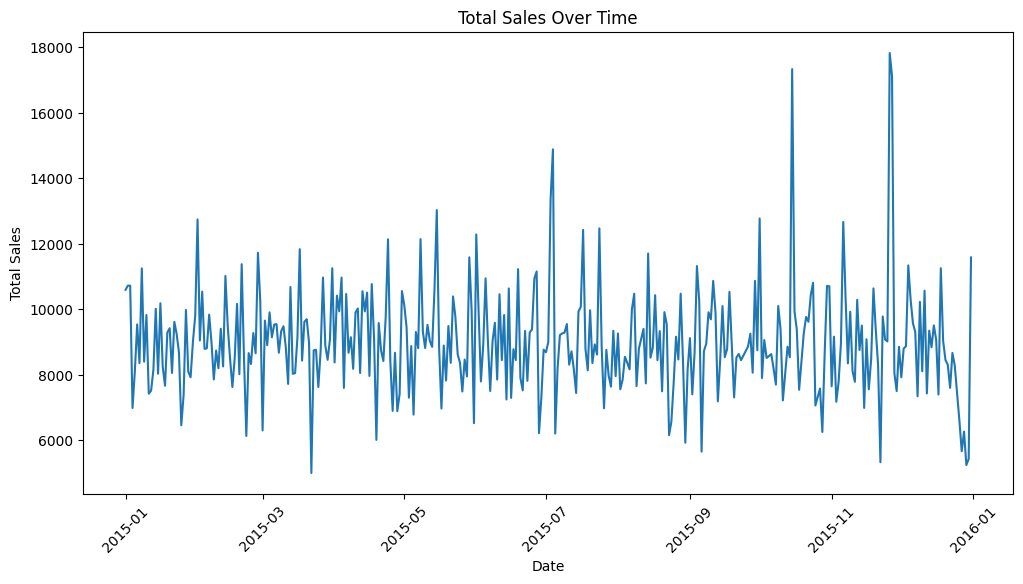

In [ ]:
sales_over_time=merged_data.groupby("order_date")["total_price"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_over_time, x="order_date", y="total_price")
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

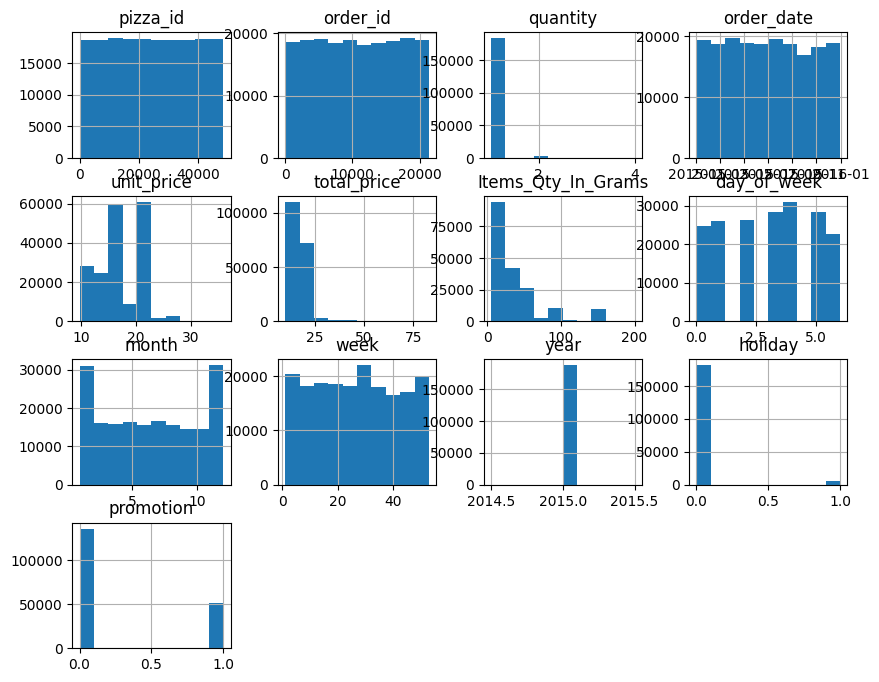

In [ ]:
merged_data.hist(figsize=(10,8))
plt.show()

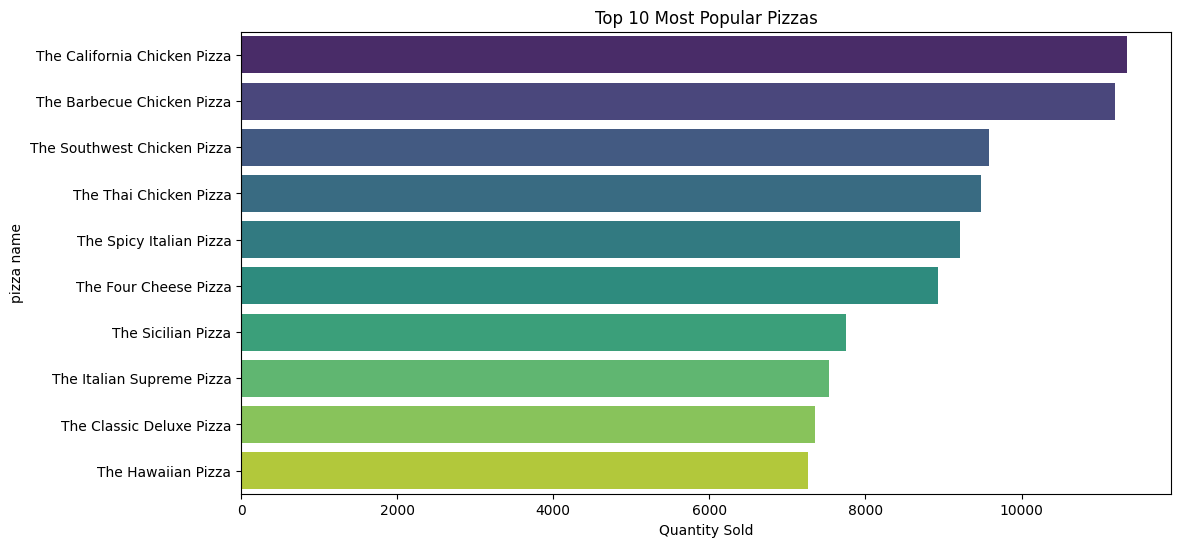

In [ ]:
pizza_sales=merged_data.groupby("pizza_name")["quantity"].sum().reset_index()
pizza_sales=pizza_sales.sort_values(by="quantity", ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=pizza_sales.head(10), x="quantity", y="pizza_name", palette="viridis")
plt.title("Top 10 Most Popular Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("pizza name")
plt.show()


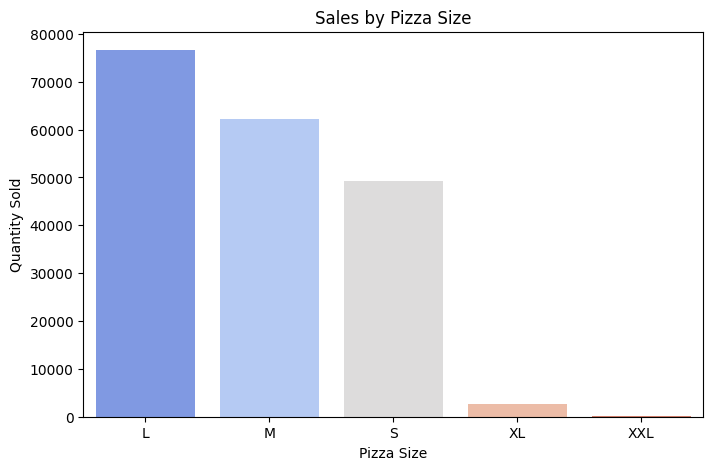

In [ ]:
size_sales = merged_data.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=size_sales, x='pizza_size', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Quantity Sold')
plt.show()

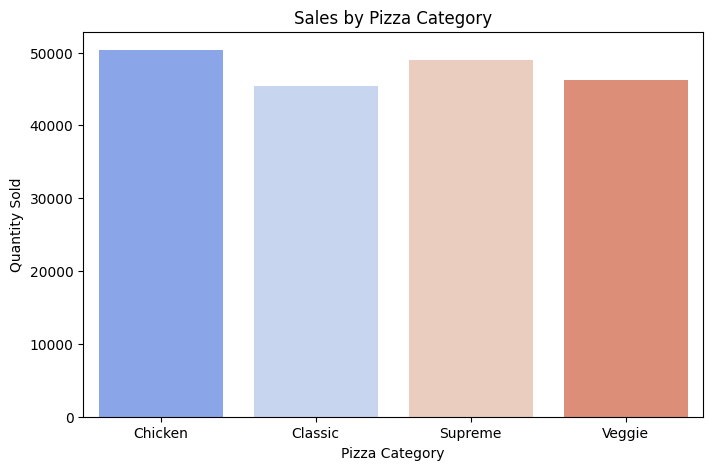

In [ ]:
category_sales = merged_data.groupby('pizza_category')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='pizza_category', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.show()

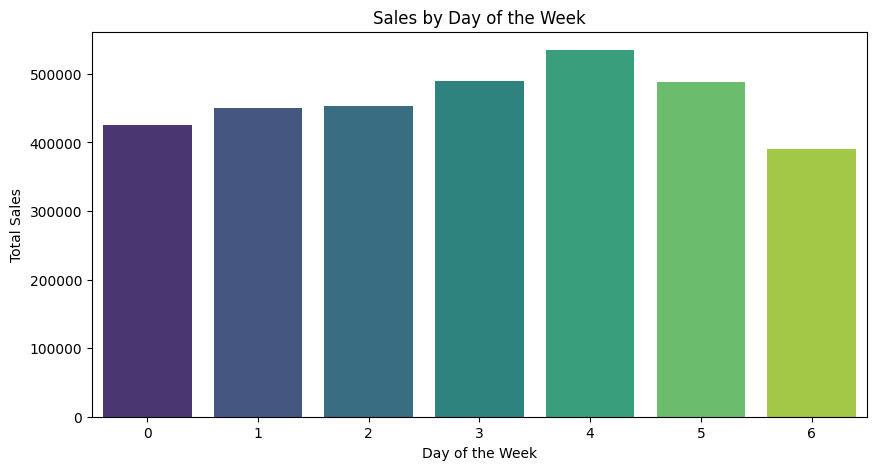

In [ ]:
sales_by_day = merged_data.groupby('day_of_week')['total_price'].sum().reset_index()


days_order = [0, 1, 2, 3, 4, 5, 6]
sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)


plt.figure(figsize=(10,5))
sns.barplot(data=sales_by_day, x='day_of_week', y='total_price', palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

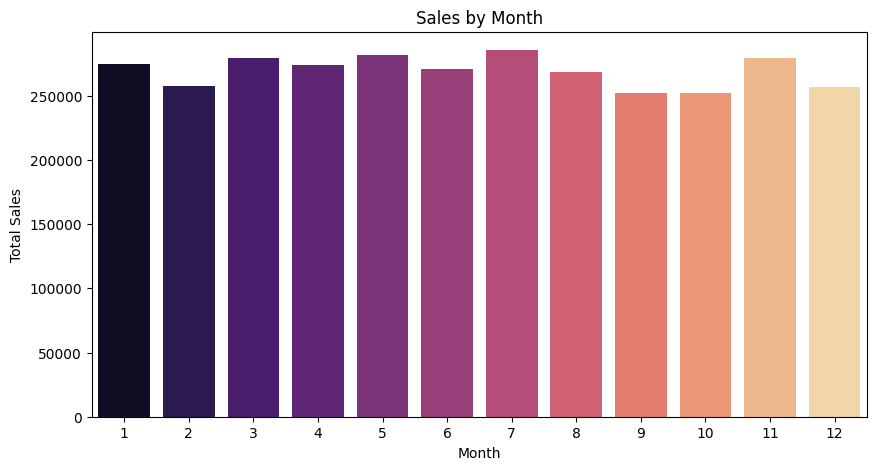

In [ ]:
sales_by_month = merged_data.groupby('month')['total_price'].sum().reset_index()


plt.figure(figsize=(10,5))
sns.barplot(data=sales_by_month, x='month', y='total_price', palette='magma')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

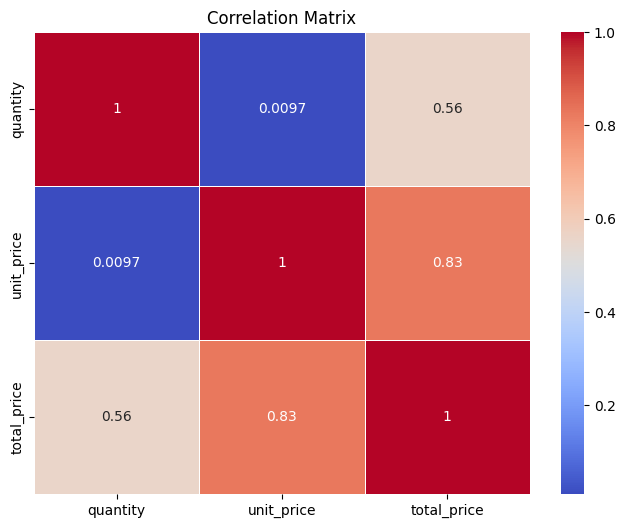

In [ ]:
corr_matrix = merged_data[['quantity', 'unit_price', 'total_price']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

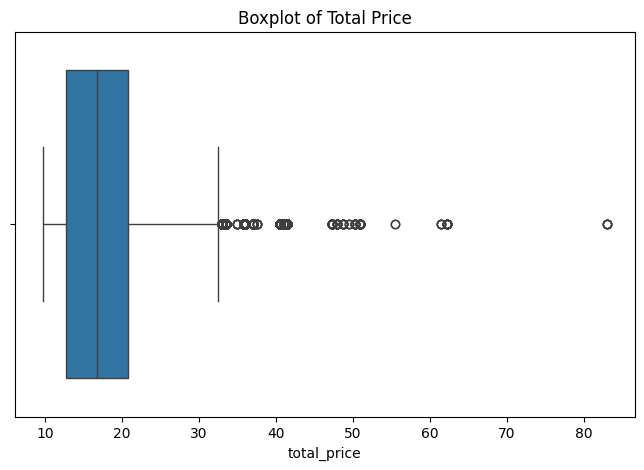

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_data, x='total_price')
plt.title('Boxplot of Total Price')
plt.show()

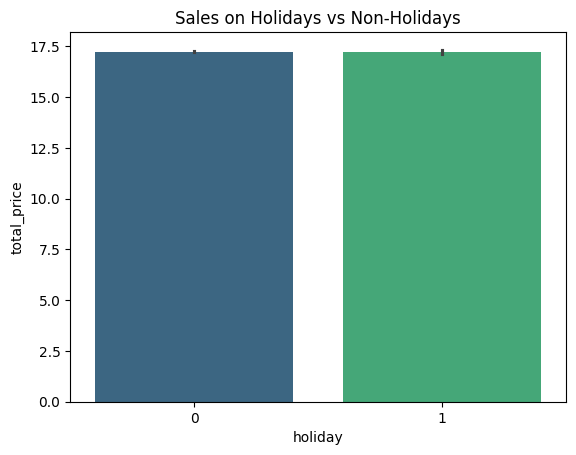

In [ ]:
sns.barplot(x='holiday', y='total_price', data=merged_data, palette='viridis')
plt.title('Sales on Holidays vs Non-Holidays')
plt.show()

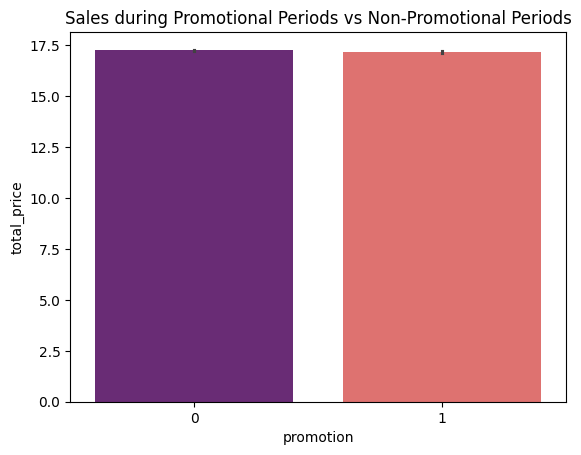

In [ ]:
sns.barplot(x='promotion', y='total_price', data=merged_data, palette='magma')
plt.title('Sales during Promotional Periods vs Non-Promotional Periods')
plt.show()

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima


In [ ]:

merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
weekly_sales = merged_data.groupby(merged_data['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()







In [ ]:
weekly_sales

,quantity
order_date,
2014-12-29,2283
2015-01-05,3735
2015-01-12,3528
2015-01-19,3674
2015-01-26,3778
2015-02-02,3802
2015-02-09,3760
2015-02-16,3574
2015-02-23,3750


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  

Best ARIMA Model MAPE: 0.1894, Best Parameters: (2, 0, 2)
Predictions:
order_date
2015-10-19    3353.883411
2015-10-26    3549.778904
2015-11-02    3677.800937
2015-11-09    3707.785329
2015-11-16    3678.680202
2015-11-23    3639.087322
2015-11-30    3615.968935
2015-12-07    3612.409428
2015-12-14    3619.348276
2015-12-21    3627.208943
2015-12-28    3631.288434
Name: predicted_mean, dtype: float64


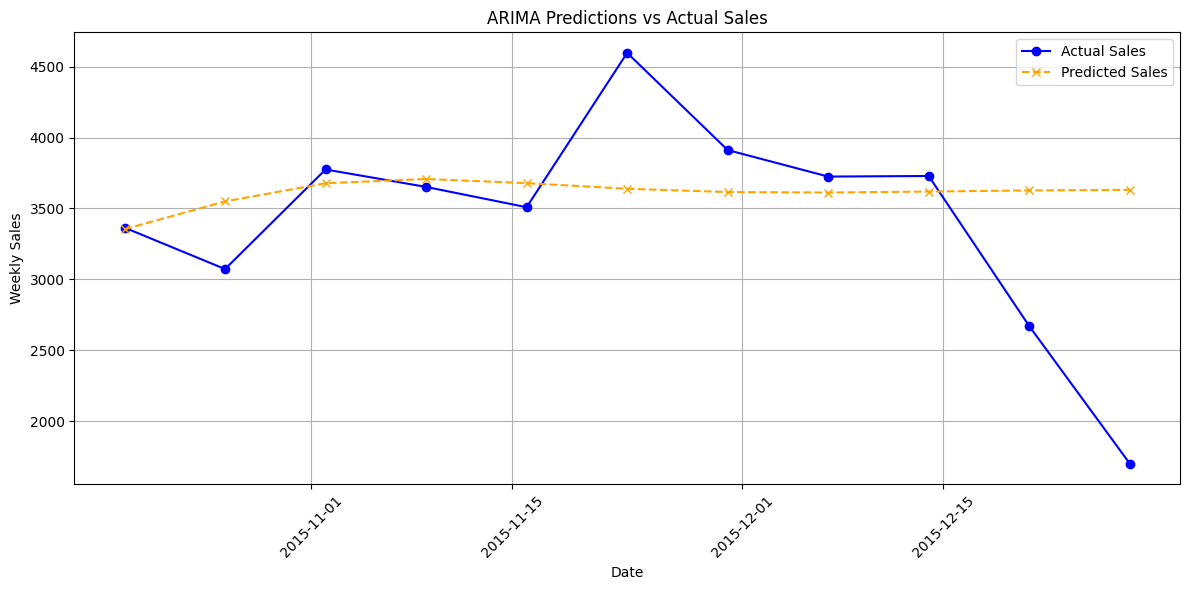

In [ ]:
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

def tune_arima_model(train, test, p_values, d_values, q_values):
    best_score, best_params, best_predictions = float("inf"), None, None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=(p, d, q)).fit()
            predictions = model.forecast(steps=len(test))
            arima_mape = mape(test, predictions)
            if arima_mape < best_score:
                best_score, best_params, best_predictions = arima_mape, (p, d, q), predictions
        except:
            continue

    print(f"Best ARIMA Model MAPE: {best_score:.4f}, Best Parameters: {best_params}")
    return best_predictions, best_score, best_params

p_values, d_values, q_values = range(0, 6), range(0, 2), range(0, 6)
arima_predictions, arima_mape_score, best_params = tune_arima_model(train, test, p_values, d_values, q_values)

arima_predictions = pd.Series(arima_predictions, index=test.index)

print("Predictions:")
print(arima_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(arima_predictions.index, arima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


Best SARIMA Model MAPE: 0.1849
Predictions:
order_date
2015-10-19    3251.125620
2015-10-26    3647.292267
2015-11-02    3407.561476
2015-11-09    2750.099059
2015-11-16    3590.353369
2015-11-23    3084.831400
2015-11-30    3327.425469
2015-12-07    3155.896996
2015-12-14    3475.639785
2015-12-21    3266.273813
2015-12-28    2592.941719
Name: predicted_mean, dtype: float64


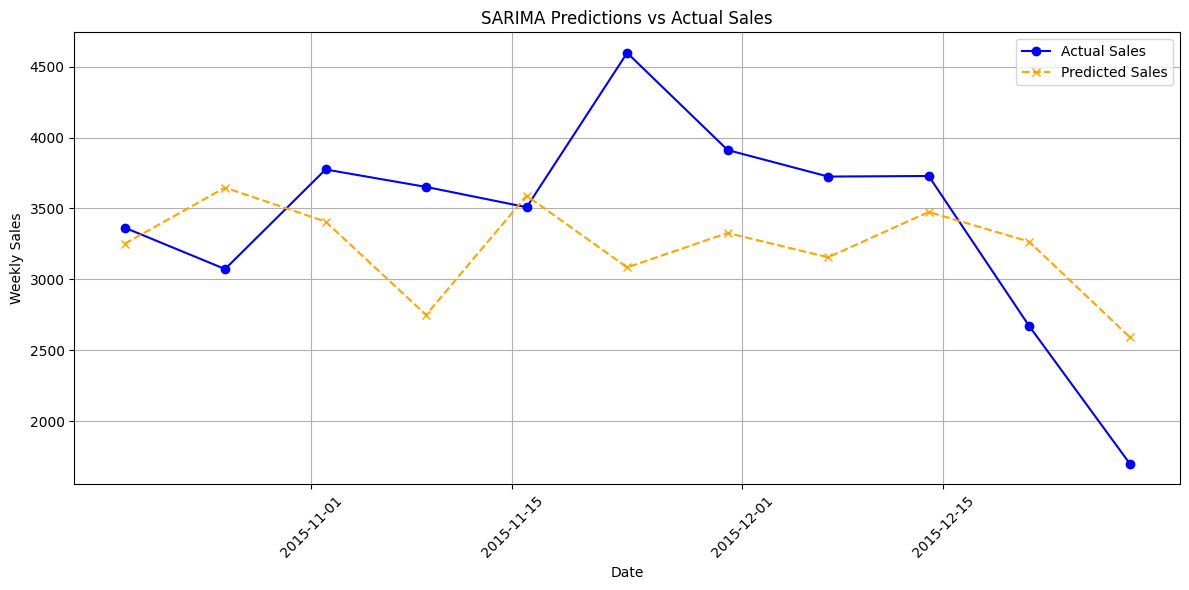

In [ ]:
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Best SARIMA Model Training and Output
def best_sarima_model(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
    predictions = model.forecast(steps=len(test))
    sarima_mape = mape(test, predictions)

    print(f"Best SARIMA Model MAPE: {sarima_mape:.4f}")
    return predictions, sarima_mape

# Train and evaluate the SARIMA model
sarima_predictions, sarima_mape_score = best_sarima_model(train, test)

# Formating the predictions for display
sarima_predictions = pd.Series(sarima_predictions, index=test.index)

print("Predictions:")
print(sarima_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(sarima_predictions.index, sarima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('SARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
weekly_sales = merged_data.groupby(merged_data['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
weekly_sales.columns = ['ds', 'y']

In [ ]:
from prophet import Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzif_ql9h/99_831kq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzif_ql9h/ismeoy3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63234', 'data', 'file=/tmp/tmpzif_ql9h/99_831kq.json', 'init=/tmp/tmpzif_ql9h/ismeoy3h.json', 'output', 'file=/tmp/tmpzif_ql9h/prophet_modelm6gxiebi/prophet_model-20241219070420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


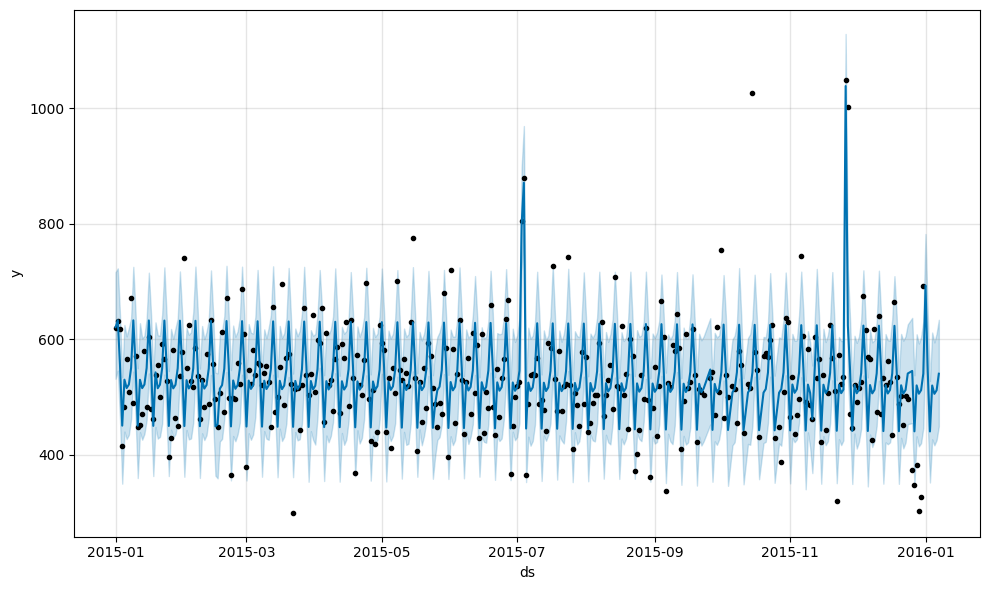

In [ ]:
# Prophet model
daily_sales['order_date'] = pd.to_datetime(daily_sales['order_date'])

# renameing the columns to 'ds' for dates and 'y' for the target values
prophet_data = daily_sales.rename(columns={'order_date': 'ds', 'quantity': 'y'})

# Model fiting
prophet_model = Prophet()
prophet_model.add_country_holidays(country_name='US')
prophet_model.fit(prophet_data)

# Future forecast for the next 7 days
future_dates = prophet_model.make_future_dataframe(periods=7)
prophet_forecast = prophet_model.predict(future_dates)

# Displaying the forecast
fig = prophet_model.plot(prophet_forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzif_ql9h/8ux874qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzif_ql9h/2og75hut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56221', 'data', 'file=/tmp/tmpzif_ql9h/8ux874qj.json', 'init=/tmp/tmpzif_ql9h/2og75hut.json', 'output', 'file=/tmp/tmpzif_ql9h/prophet_model83kzakwr/prophet_model-20241219070449.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:49 - cmdstanpy - INFO - Chai

Best Prophet Model MAPE: 0.1962
Predictions:
ds
2015-10-19    3619.506283
2015-10-26    3618.034527
2015-11-02    3616.562771
2015-11-09    3615.091015
2015-11-16    3613.619259
2015-11-23    3612.147503
2015-11-30    3610.675747
2015-12-07    3609.203991
2015-12-14    3607.732235
2015-12-21    3606.260479
2015-12-28    3604.788723
dtype: float64


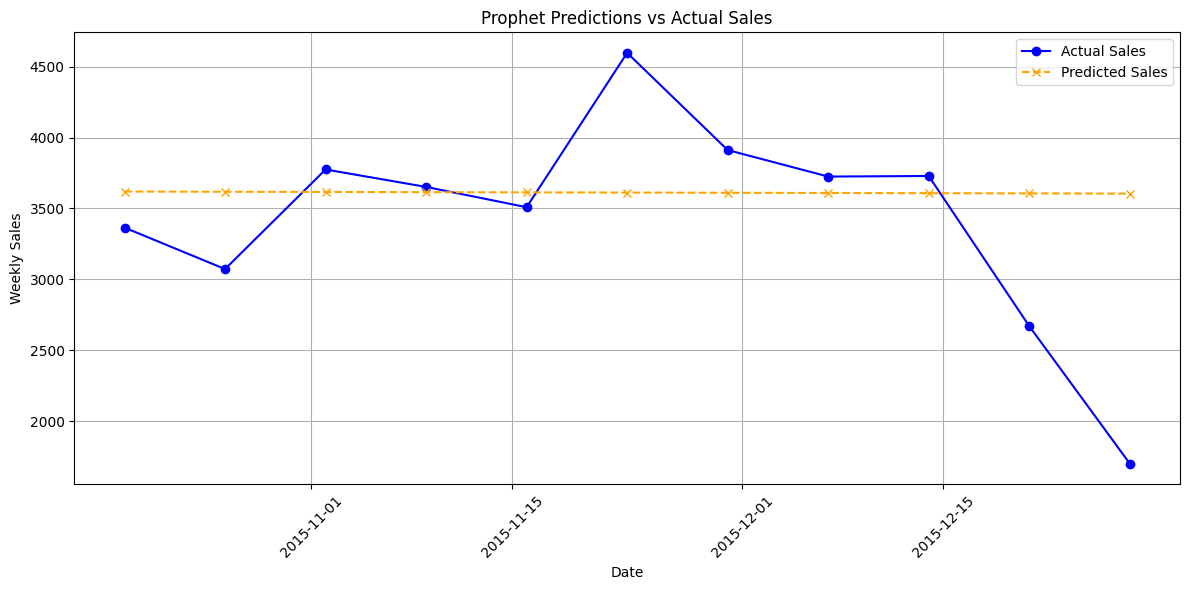

In [ ]:
# train test split
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Best Prophet Model Training and Output
def best_prophet_model(train, test):
    model = Prophet()
    model.fit(train)

    future = model.make_future_dataframe(periods=len(test), freq='W')
    forecast = model.predict(future)
    predictions = forecast['yhat'][-len(test):].values
    prophet_mape = mape(test['y'].values, predictions)

    print(f"Best Prophet Model MAPE: {prophet_mape:.4f}")
    return predictions, prophet_mape

# Train and evaluate the Prophet model
prophet_predictions, prophet_mape_score = best_prophet_model(train, test)

# Formating the predictions for display
prophet_predictions = pd.Series(prophet_predictions, index=test['ds'])

print("Predictions:")
print(prophet_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual Sales', color='blue', marker='o')
plt.plot(prophet_predictions.index, prophet_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Prophet Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
weekly_sales = merged_data.groupby(merged_data['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()

In [ ]:
def create_regression_features(merged_data):
    merged_data['week_of_year'] = merged_data['order_date'].dt.isocalendar().week
    merged_data['day_of_week'] = merged_data['order_date'].dt.dayofweek
    merged_data['month'] = merged_data['order_date'].dt.month
    merged_data['year'] = merged_data['order_date'].dt.year
    return merged_data

weekly_sales = create_regression_features(weekly_sales)

Best Regression Model MAPE: 0.1911
Predictions:
order_date
2015-10-19    3545.287304
2015-10-26    3530.562085
2015-11-02    3552.361183
2015-11-09    3537.635964
2015-11-16    3522.910745
2015-11-23    3508.185526
2015-11-30    3493.460307
2015-12-07    3515.259404
2015-12-14    3500.534185
2015-12-21    3485.808966
2015-12-28    3471.083747
dtype: float64


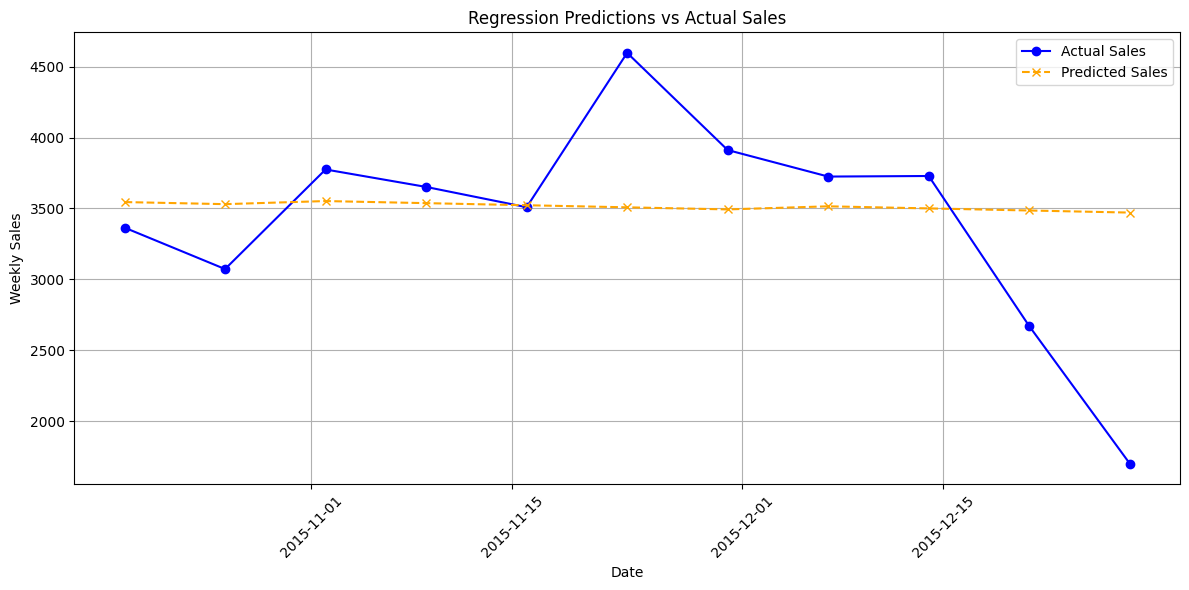

In [ ]:
train_size = int(0.8 * len(weekly_sales))
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# Prepareing data for Regression
X_train = train[['week_of_year', 'day_of_week', 'month', 'year']]
y_train = train['quantity']
X_test = test[['week_of_year', 'day_of_week', 'month', 'year']]
y_test = test['quantity']

# Best Regression Model Training and Output
def best_regression_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    regression_mape = mape(y_test, predictions)

    print(f"Best Regression Model MAPE: {regression_mape:.4f}")
    return predictions, regression_mape

# Train and evaluate the Regression model
regression_predictions, regression_mape_score = best_regression_model(X_train, y_train, X_test, y_test)

# Formating the predictions for display
regression_predictions = pd.Series(regression_predictions, index=test['order_date'])

print("Predictions:")
print(regression_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['order_date'], y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(regression_predictions.index, regression_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Regression Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
merged_data['week'] = merged_data['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales_by_pizza = merged_data.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
weekly_sales_by_pizza.set_index('week', inplace=True)


In [ ]:
def forecast_sales_per_pizza_type_arima(pizza_type, train, periods=1):
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting for the next week
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Forecasting next week's sales for each pizza type using ARIMA
def forecast_next_week_sales_by_pizza_type_arima(weekly_sales_by_pizza, periods=1):
    pizza_type_forecasts = {}

    # Total sales per pizza type
    total_units_sold = weekly_sales_by_pizza.groupby('pizza_name_id')['quantity'].sum()

    # Last week in the dataset
    last_week = weekly_sales_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in weekly_sales_by_pizza['pizza_name_id'].unique():
        pizza_type_data = weekly_sales_by_pizza[weekly_sales_by_pizza['pizza_name_id'] == pizza_type]

        # train test split
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]['quantity']

        # Forecast sales using ARIMA
        pizza_type, forecast = forecast_sales_per_pizza_type_arima(pizza_type, train, periods)

        if forecast is not None:
            pizza_type_forecasts[pizza_type] = forecast
        else:
            print(f"Forecast failed for pizza type: {pizza_type}")

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Forecasting pizza sales for the next week using ARIMA
next_week_pizza_sales_forecasts_arima, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type_arima(weekly_sales_by_pizza, periods=1)

# Displaying the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")
total_forecasted_quantity = 0

for pizza_type, forecast in next_week_pizza_sales_forecasts_arima.items():
    forecast = int(forecast[0])
    next_week_pizza_sales_forecasts_arima[pizza_type]=forecast
    print(f'{pizza_type}: {forecast} pizzas')
    total_forecasted_quantity += forecast

print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 92 pizzas
bbq_ckn_m: 91 pizzas
bbq_ckn_s: 27 pizzas
big_meat_s: 107 pizzas
brie_carre_s: 37 pizzas
calabrese_m: 43 pizzas
calabrese_s: 8 pizzas
cali_ckn_l: 80 pizzas
cali_ckn_m: 81 pizzas
cali_ckn_s: 39 pizzas
ckn_alfredo_l: 14 pizzas
ckn_alfredo_m: 61 pizzas
ckn_alfredo_s: 9 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 21 pizzas
ckn_pesto_s: 15 pizzas
classic_dlx_l: 26 pizzas
classic_dlx_m: 72 pizzas
classic_dlx_s: 46 pizzas
five_cheese_l: 56 pizzas
four_cheese_l: 114 pizzas
four_cheese_m: 45 pizzas
green_garden_l: 10 pizzas
green_garden_m: 25 pizzas
green_garden_s: 46 pizzas
hawaiian_l: 50 pizzas
hawaiian_m: 24 pizzas
hawaiian_s: 52 pizzas
ital_cpcllo_l: 55 pizzas
ital_cpcllo_m: 30 pizzas
ital_cpcllo_s: 23 pizzas
ital_supr_l: 52 pizzas
ital_supr_m: 66 pizzas
ital_supr_s: 14 pizzas
ital_veggie_l: 20 pizzas
ital_veggie_m: 36 pizzas
ital_veggie_s: 16 pizzas
mediterraneo_l: 36 pizzas
mediterraneo_m: 23 pizzas
mediterraneo_s

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
def forecast_sales_per_pizza_type(pizza_type, train, periods=1):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(disp=False)

    # Forecasting for the next week
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Forecasting for each pizza type for the next week
def forecast_next_week_sales_by_pizza_type(weekly_sales_by_pizza, periods=1):
    pizza_type_forecasts = {}
    total_units_sold = weekly_sales_by_pizza.groupby('pizza_name_id')['quantity'].sum()

    # Last week in the dataset
    last_week = weekly_sales_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in weekly_sales_by_pizza['pizza_name_id'].unique():
        pizza_type_data = weekly_sales_by_pizza[weekly_sales_by_pizza['pizza_name_id'] == pizza_type]

        # train test data
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]['quantity']
        pizza_type, forecast = forecast_sales_per_pizza_type(pizza_type, train, periods)

        if forecast:
            pizza_type_forecasts[pizza_type] = forecast[0]  # Access the first value of the forecast list

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Forecasting pizza sales for the next week
next_week_pizza_sales_forecasts, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type(weekly_sales_by_pizza, periods=1)

# Displaying the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")

total_forecasted_quantity = 0

for pizza_type, forecast in next_week_pizza_sales_forecasts.items():
    forecast = int(forecast)
    next_week_pizza_sales_forecasts[pizza_type]=forecast
    print(f'{pizza_type}: {forecast} pizzas')
    total_forecasted_quantity += forecast

# Displaying the total quantity of units sold in the predicted week
print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 82 pizzas
bbq_ckn_m: 95 pizzas
bbq_ckn_s: 39 pizzas
big_meat_s: 89 pizzas
brie_carre_s: 56 pizzas
calabrese_m: 40 pizzas
calabrese_s: 6 pizzas
cali_ckn_l: 83 pizzas
cali_ckn_m: 56 pizzas
cali_ckn_s: 38 pizzas
ckn_alfredo_l: 9 pizzas
ckn_alfredo_m: 58 pizzas
ckn_alfredo_s: 11 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 14 pizzas
ckn_pesto_s: 14 pizzas
classic_dlx_l: 19 pizzas
classic_dlx_m: 72 pizzas
classic_dlx_s: 39 pizzas
five_cheese_l: 55 pizzas
four_cheese_l: 149 pizzas
four_cheese_m: 44 pizzas
green_garden_l: 2 pizzas
green_garden_m: 28 pizzas
green_garden_s: 46 pizzas
hawaiian_l: 48 pizzas
hawaiian_m: 20 pizzas
hawaiian_s: 46 pizzas
ital_cpcllo_l: 60 pizzas
ital_cpcllo_m: 37 pizzas
ital_cpcllo_s: 26 pizzas
ital_supr_l: 61 pizzas
ital_supr_m: 49 pizzas
ital_supr_s: 3 pizzas
ital_veggie_l: 16 pizzas
ital_veggie_m: 25 pizzas
ital_veggie_s: 16 pizzas
mediterraneo_l: 37 pizzas
mediterraneo_m: 29 pizzas
mediterraneo_s: 1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
def forecast_sales_per_pizza_type_prophet(pizza_type, train, periods=1):
    # Prepare the data for Prophet
    train_prophet = train.reset_index().rename(columns={'week': 'ds', 'quantity': 'y'})

    # Fit the Prophet model
    model = Prophet()
    model.fit(train_prophet)

    # Create a DataFrame to hold the future dates
    future = model.make_future_dataframe(periods=periods)

    # Forecasting
    forecast = model.predict(future)
    return pizza_type, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods)

# Forecasting next week's sales for each pizza type using Prophet
def forecast_next_week_sales_by_pizza_type_prophet(weekly_sales_by_pizza, periods=7):
    pizza_type_forecasts = {}

    # Last week in the dataset
    last_week = weekly_sales_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in weekly_sales_by_pizza['pizza_name_id'].unique():
        pizza_type_data = weekly_sales_by_pizza[weekly_sales_by_pizza['pizza_name_id'] == pizza_type]

        # Train-test split
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]

        # Forecast sales using Prophet
        pizza_type, forecast = forecast_sales_per_pizza_type_prophet(pizza_type, train, periods)

        if forecast is not None:
            pizza_type_forecasts[pizza_type] = forecast['yhat'].sum()  # Total forecasted sales for the week
        else:
            print(f"Forecast failed for pizza type: {pizza_type}")

    return pizza_type_forecasts, next_week_start, next_week_end

# Forecasting pizza sales for the next week using Prophet
next_week_pizza_sales_forecasts_prophet, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type_prophet(weekly_sales_by_pizza, periods=1)

# Displaying the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")
total_forecasted_quantity = sum(next_week_pizza_sales_forecasts_prophet.values())

for pizza_type, forecast in next_week_pizza_sales_forecasts_prophet.items():
    print(f'{pizza_type}: {int(forecast)} pizzas')

print(f"Total quantity of units sold in the predicted week: {int(total_forecasted_quantity)} pizzas")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzif_ql9h/zol9i4mt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzif_ql9h/v5g99ei0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85226', 'data', 'file=/tmp/tmpzif_ql9h/zol9i4mt.json', 'init=/tmp/tmpzif_ql9h/v5g99ei0.json', 'output', 'file=/tmp/tmpzif_ql9h/prophet_model1wu1ommk/prophet_model-20241219071224.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:12:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:24 - cmdstanpy - INFO - Chai

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 86 pizzas
bbq_ckn_m: 94 pizzas
bbq_ckn_s: 26 pizzas
big_meat_s: 109 pizzas
brie_carre_s: 39 pizzas
calabrese_m: 44 pizzas
calabrese_s: 8 pizzas
cali_ckn_l: 86 pizzas
cali_ckn_m: 80 pizzas
cali_ckn_s: 39 pizzas
ckn_alfredo_l: 15 pizzas
ckn_alfredo_m: 64 pizzas
ckn_alfredo_s: 10 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 23 pizzas
ckn_pesto_s: 21 pizzas
classic_dlx_l: 26 pizzas
classic_dlx_m: 74 pizzas
classic_dlx_s: 46 pizzas
five_cheese_l: 54 pizzas
four_cheese_l: 123 pizzas
four_cheese_m: 43 pizzas
green_garden_l: 11 pizzas
green_garden_m: 23 pizzas
green_garden_s: 51 pizzas
hawaiian_l: 55 pizzas
hawaiian_m: 29 pizzas
hawaiian_s: 52 pizzas
ital_cpcllo_l: 59 pizzas
ital_cpcllo_m: 25 pizzas
ital_cpcllo_s: 21 pizzas
ital_supr_l: 55 pizzas
ital_supr_m: 67 pizzas
ital_supr_s: 15 pizzas
ital_veggie_l: 13 pizzas
ital_veggie_m: 34 pizzas
ital_veggie_s: 14 pizzas
mediterraneo_l: 36 pizzas
mediterraneo_m: 26 pizzas
mediterraneo_

In [ ]:
import pandas as pd

# Model results as a dictionary
model_performance = {
    'Model': ['SARIMA', 'ARIMA', 'Regression', 'Prophet', 'LSTM'],
    'MAPE': [0.1849, 0.1896, 0.1911, 0.1962, 0.2404]
}

# Createing a DataFrame
df_performance = pd.DataFrame(model_performance)

# Highlight best and worst models
df_performance['Rank'] = df_performance['MAPE'].rank()
df_performance = df_performance.sort_values('MAPE', ascending=True)
df_performance['Best/Worst'] = df_performance['MAPE'].apply(lambda x: 'Best' if x == df_performance['MAPE'].min() else 'Worst' if x == df_performance['MAPE'].max() else '')

# Display table
df_performance

,Model,MAPE,Rank,Best/Worst
0,SARIMA,0.1849,1.0,Best
1,ARIMA,0.1896,2.0,
2,Regression,0.1911,3.0,
3,Prophet,0.1962,4.0,
4,LSTM,0.2404,5.0,Worst


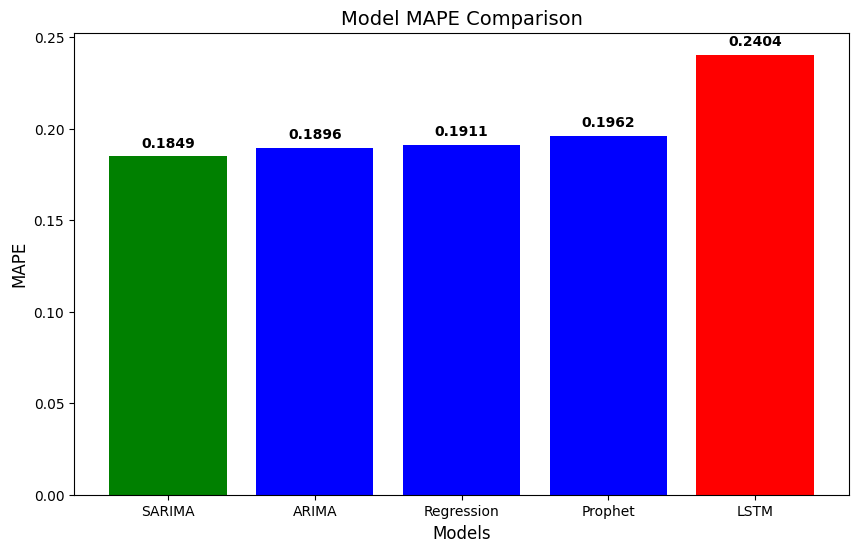

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['SARIMA', 'ARIMA', 'Regression', 'Prophet', 'LSTM']
mapes = [0.1849, 0.1896, 0.1911, 0.1962, 0.2404]

plt.figure(figsize=(10,6))
plt.bar(models, mapes, color=['green', 'blue', 'blue', 'blue', 'red'])

# Highlighting the best and worst models
plt.title('Model MAPE Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MAPE', fontsize=12)

for i, v in enumerate(mapes):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.show()


In [ ]:
train = weekly_sales.reset_index().rename(columns={'order_date':'ds','quantity':'y'})
train['ds'] = pd.to_datetime(train['ds']).dt.to_period('D').astype(int)
sarima_model = SARIMAX(train['y'], exog=train['ds'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
print(sarima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   53
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -339.161
Date:                           Thu, 19 Dec 2024   AIC                            690.321
Time:                                   07:15:36   BIC                            701.161
Sample:                                        0   HQIC                           694.362
                                            - 53                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ds             0.3560      0.165      2.156      0.031       0.032       0.680
ar.L1          0.1527      0.276      0.554

In [ ]:
auto_model = auto_arima(train['y'], seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True,
                        exogenous=train[['ds']]) # Pass 'ds' as exogenous variable
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=799.848, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=800.238, Time=0.50 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=800.637, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1021.296, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=801.847, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=801.727, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=803.726, Time=2.10 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=799.344, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=801.017, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=801.759, Time=1.45 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=799.858, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=800.527, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=798.916, Time=0.08 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=801.100,

In [ ]:
import pickle # Importing pickle for saving the model

# Save the model to a file using pickle
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(auto_model, file)
print(f"Model saved as {model_filename}")

Model saved as best_sarima_model.pkl


In [ ]:
# Load the model from the file using pickle
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Loading the model
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Forecasting function
def forecast_sales(loaded_model, periods):
    forecast = loaded_model.predict(n_periods=periods)
    return forecast

forecasted_sales = forecast_sales(loaded_model, periods=7)
print(forecasted_sales)

53    3109.864812
54    3586.777982
55    3586.777982
56    3586.777982
57    3586.777982
58    3586.777982
59    3586.777982
dtype: float64


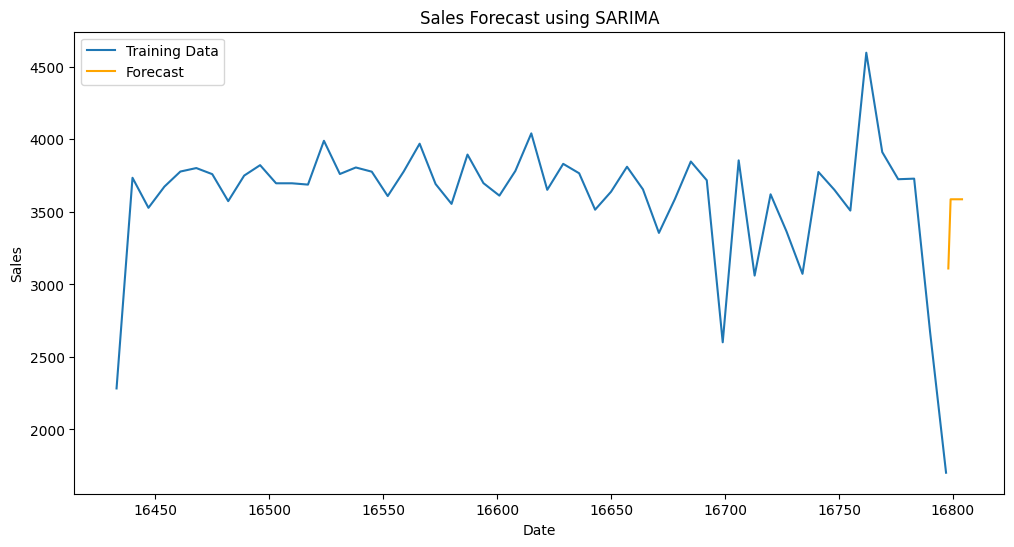

In [ ]:
with open('best_sarima_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Forecasting the data
n_forecast = 7
forecast = best_model.predict(n_periods=n_forecast)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Training Data') # Changed train.index to train['ds']

# Since train['ds'] is numeric, generate a range of numbers for the x-axis of the forecast
# Instead of date_range, use a simple range starting from the last value of 'ds'
plt.plot(range(train['ds'].iloc[-1] + 1, train['ds'].iloc[-1] + 1 + n_forecast),
         forecast, label='Forecast', color='orange')

plt.title('Sales Forecast using SARIMA')
plt.xlabel('Date') # Note: x-axis is no longer actual dates but period numbers
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Displaying the total quantity of predicted ingredients

# Copy ingredients, map predicted sales, and calculateing the total ingredient quantity
ingredients_predicted = ingredients_dataset.copy()
ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name_id'].map(next_week_pizza_sales_forecasts_arima)
ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']

# Sum of the quantities for each ingredient
ingredient_totals = ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().to_dict()
print("Total quantity of predicted ingredients for the following week:")
print(ingredient_totals)
ingredients_predicted

Total quantity of predicted ingredients for the following week:
{'?duja Salami': 2540.0, 'Alfredo Sauce': 1285.0, 'Anchovies': 3295.0, 'Artichokes': 10485.0, 'Arugula': 705.0, 'Asiago Cheese': 6200.0, 'Bacon': 28670.0, 'Barbecue Sauce': 2425.0, 'Barbecued Chicken': 6950.0, 'Beef Chuck Roast': 10660.0, 'Blue Cheese': 1680.0, 'Brie Carre Cheese': 1110.0, 'Calabrese Salami': 15100.0, 'Capocollo': 62100.0, 'Caramelized Onions': 592.0, 'Chicken': 80800.0, 'Chipotle Sauce': 7330.0, 'Chorizo Sausage': 5350.0, 'Cilantro': 3665.0, 'Coarse Sicilian Salami': 11480.0, 'Corn': 24540.0, 'Eggplant': 2960.0, 'Feta Cheese': 9970.0, 'Fontina Cheese': 5840.0, 'Friggitello Peppers': 635.0, 'Garlic': 23835.0, 'Genoa Salami': 8790.0, 'Goat Cheese': 12940.0, 'Gorgonzola Piccante Cheese': 5460.0, 'Gouda Cheese': 4410.0, 'Green Olives': 4745.0, 'Green Peppers': 6840.0, 'Italian Sausage': 1070.0, 'Jalapeno Peppers': 5870.0, 'Kalamata Olives': 3070.0, 'Luganega Sausage': 5740.0, 'Mozzarella Cheese': 11560.0, 'Mu

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,predicted_quantity,total_ingredient_qty
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,92,3680.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,92,1380.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,92,1840.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,92,2760.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,92,5520.0
...,...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,33,660.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,33,660.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,33,330.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,33,495.0


In [ ]:
ingredient_totals

{'?duja Salami': 2540.0,
 'Alfredo Sauce': 1285.0,
 'Anchovies': 3295.0,
 'Artichokes': 10485.0,
 'Arugula': 705.0,
 'Asiago Cheese': 6200.0,
 'Bacon': 28670.0,
 'Barbecue Sauce': 2425.0,
 'Barbecued Chicken': 6950.0,
 'Beef Chuck Roast': 10660.0,
 'Blue Cheese': 1680.0,
 'Brie Carre Cheese': 1110.0,
 'Calabrese Salami': 15100.0,
 'Capocollo': 62100.0,
 'Caramelized Onions': 592.0,
 'Chicken': 80800.0,
 'Chipotle Sauce': 7330.0,
 'Chorizo Sausage': 5350.0,
 'Cilantro': 3665.0,
 'Coarse Sicilian Salami': 11480.0,
 'Corn': 24540.0,
 'Eggplant': 2960.0,
 'Feta Cheese': 9970.0,
 'Fontina Cheese': 5840.0,
 'Friggitello Peppers': 635.0,
 'Garlic': 23835.0,
 'Genoa Salami': 8790.0,
 'Goat Cheese': 12940.0,
 'Gorgonzola Piccante Cheese': 5460.0,
 'Gouda Cheese': 4410.0,
 'Green Olives': 4745.0,
 'Green Peppers': 6840.0,
 'Italian Sausage': 1070.0,
 'Jalapeno Peppers': 5870.0,
 'Kalamata Olives': 3070.0,
 'Luganega Sausage': 5740.0,
 'Mozzarella Cheese': 11560.0,
 'Mushrooms': 25860.0,
 'Onions

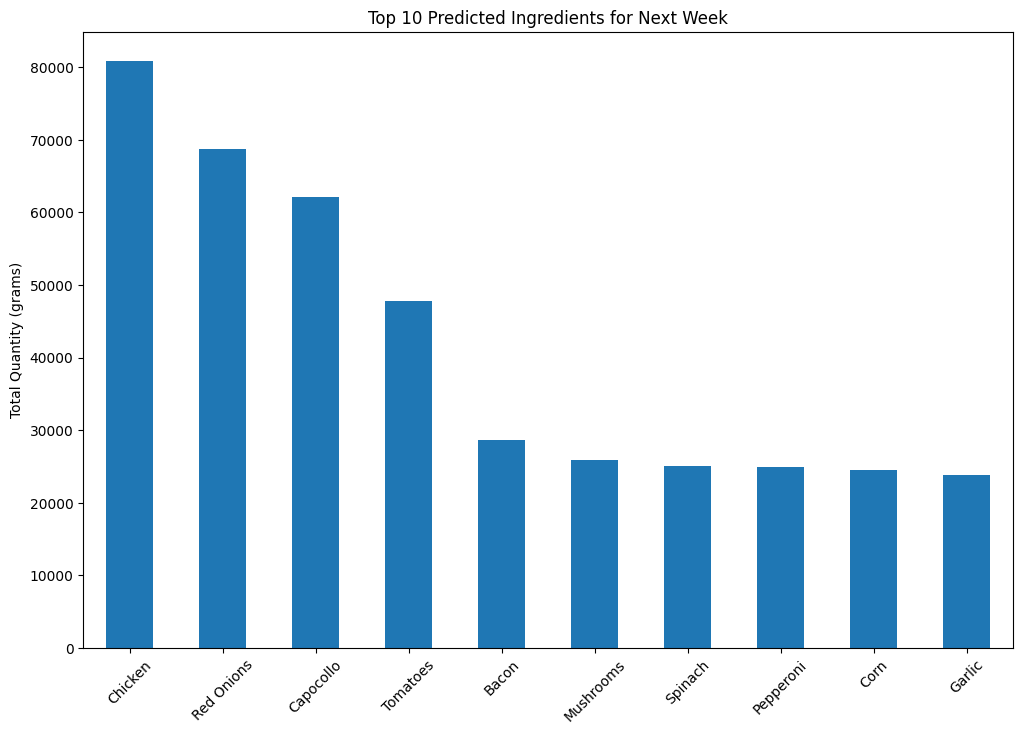

In [ ]:
import pandas as pd  # Import pandas if not already imported

plt.figure(figsize=(12, 8))
# Convert the ingredient_totals dictionary to a Pandas Series
# for using nlargest
ingredient_totals_series = pd.Series(ingredient_totals)

# Get the top 10 ingredients
top_10_ingredients = ingredient_totals_series.nlargest(10)

# Plot the top 10 ingredients
top_10_ingredients.plot(kind='bar', legend=False)

plt.title('Top 10 Predicted Ingredients for Next Week')
plt.ylabel('Total Quantity (grams)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ingredient_totals_df = pd.DataFrame(ingredient_totals.items(), columns=['Ingredient', 'Total Quantity (grams)'])
ingredient_totals_df.to_csv('predicted_ingredient_totals.csv', index=False)
print("Predicted ingredient totals saved to 'predicted_ingredient_totals.csv'")

Predicted ingredient totals saved to 'predicted_ingredient_totals.csv'


In [ ]:
predicted_ingredient_totals = pd.read_csv('predicted_ingredient_totals.csv')
predicted_ingredient_totals

,Ingredient,Total Quantity (grams)
0,?duja Salami,2540.0
1,Alfredo Sauce,1285.0
2,Anchovies,3295.0
3,Artichokes,10485.0
4,Arugula,705.0
...,...,...
59,Sun-dried Tomatoes,1490.0
60,Thai Sweet Chilli Sauce,4170.0
61,Thyme,185.0
62,Tomatoes,47840.0
